In [2]:
HOME = "./TextData"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Import the data

In [12]:
sgd_forward = pd.read_csv(HOME + "sgd_forward_train_loss.csv")
sgd_backward = pd.read_csv(HOME + "sgd_backward_lr3_train_loss.csv")

adam_forward = pd.read_csv(HOME + "adam_forward_train_loss.csv")
adam_forward2 = pd.read_csv(HOME + "adam_forward2_train_loss.csv")
adam_forward3 = pd.read_csv(HOME + "adam_forward3_train_loss.csv")
adam_backward = pd.read_csv(HOME + "adam_backward_train_loss.csv")
adam_backward2 = pd.read_csv(HOME + "adam_backward2_train_loss.csv")
adam_backward3 = pd.read_csv(HOME + "adam_backward3_train_loss.csv")

adagrad_forward = pd.read_csv(HOME + "adagrad_forward_train_loss.csv")
adagrad_forward2 = pd.read_csv(HOME + "adagrad_forward2_train_loss.csv")
adagrad_forward3 = pd.read_csv(HOME + "adagrad_forward3_train_loss.csv")
adagrad_backward = pd.read_csv(HOME + "adagrad_backward_train_loss.csv")
adagrad_backward2 = pd.read_csv(HOME + "adagrad_backward2_train_loss.csv")
adagrad_backward3 = pd.read_csv(HOME + "adagrad_backward3_train_loss.csv")


mom_forward = pd.read_csv(HOME + "momentumSGD_forward_train_loss.csv")
mom_backward = pd.read_csv(HOME + "momentumSGD_backward_train_loss.csv")

In [39]:
adam_forward_perf = pd.read_csv(HOME + "adam_forward_performance_metrics.csv")
adam_backward_perf = pd.read_csv(HOME + "adam_backward_performance_metrics.csv")


adagrad_forward_perf = pd.read_csv(HOME + "adagrad_forward_performance_metrics.csv")
adagrad_backward_perf = pd.read_csv(HOME + "adagrad_backward_performance_metrics.csv")

sgd_backward_perf = pd.read_csv(HOME + "sgd_backward_lr3_performance_metrics.csv")
sgd_forward_perf = pd.read_csv(HOME + "sgd_forward_performance_metrics.csv")


# Produce the plots

In [37]:
adam_forward['epoch'] = ((adam_forward['step'] - 1)/ 175).astype(int) + 1
adam_forward_loss_per_epoch = adam_forward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})
adam_backward['epoch'] = ((adam_backward['step'] - 1)/ 175).astype(int) + 1
adam_backward_loss_per_epoch = adam_backward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})


adagrad_forward['epoch'] = ((adagrad_forward['step'] - 1)/ 175).astype(int) + 1
adagrad_forward_loss_per_epoch = adagrad_forward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})
adagrad_backward['epoch'] = ((adagrad_backward['step'] - 1)/ 175).astype(int) + 1
adagrad_backward_loss_per_epoch = adagrad_backward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})


sgd_forward['epoch'] = ((sgd_forward['step'] - 1)/ 175).astype(int) + 1
sgd_forward_loss_per_epoch = sgd_forward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})
sgd_backward['epoch'] = ((sgd_backward['step'] - 1)/ 175).astype(int) + 1
sgd_backward_loss_per_epoch = sgd_backward.groupby(by='epoch')['loss_step'].sum().reset_index().rename(columns={'loss_step':'loss'})


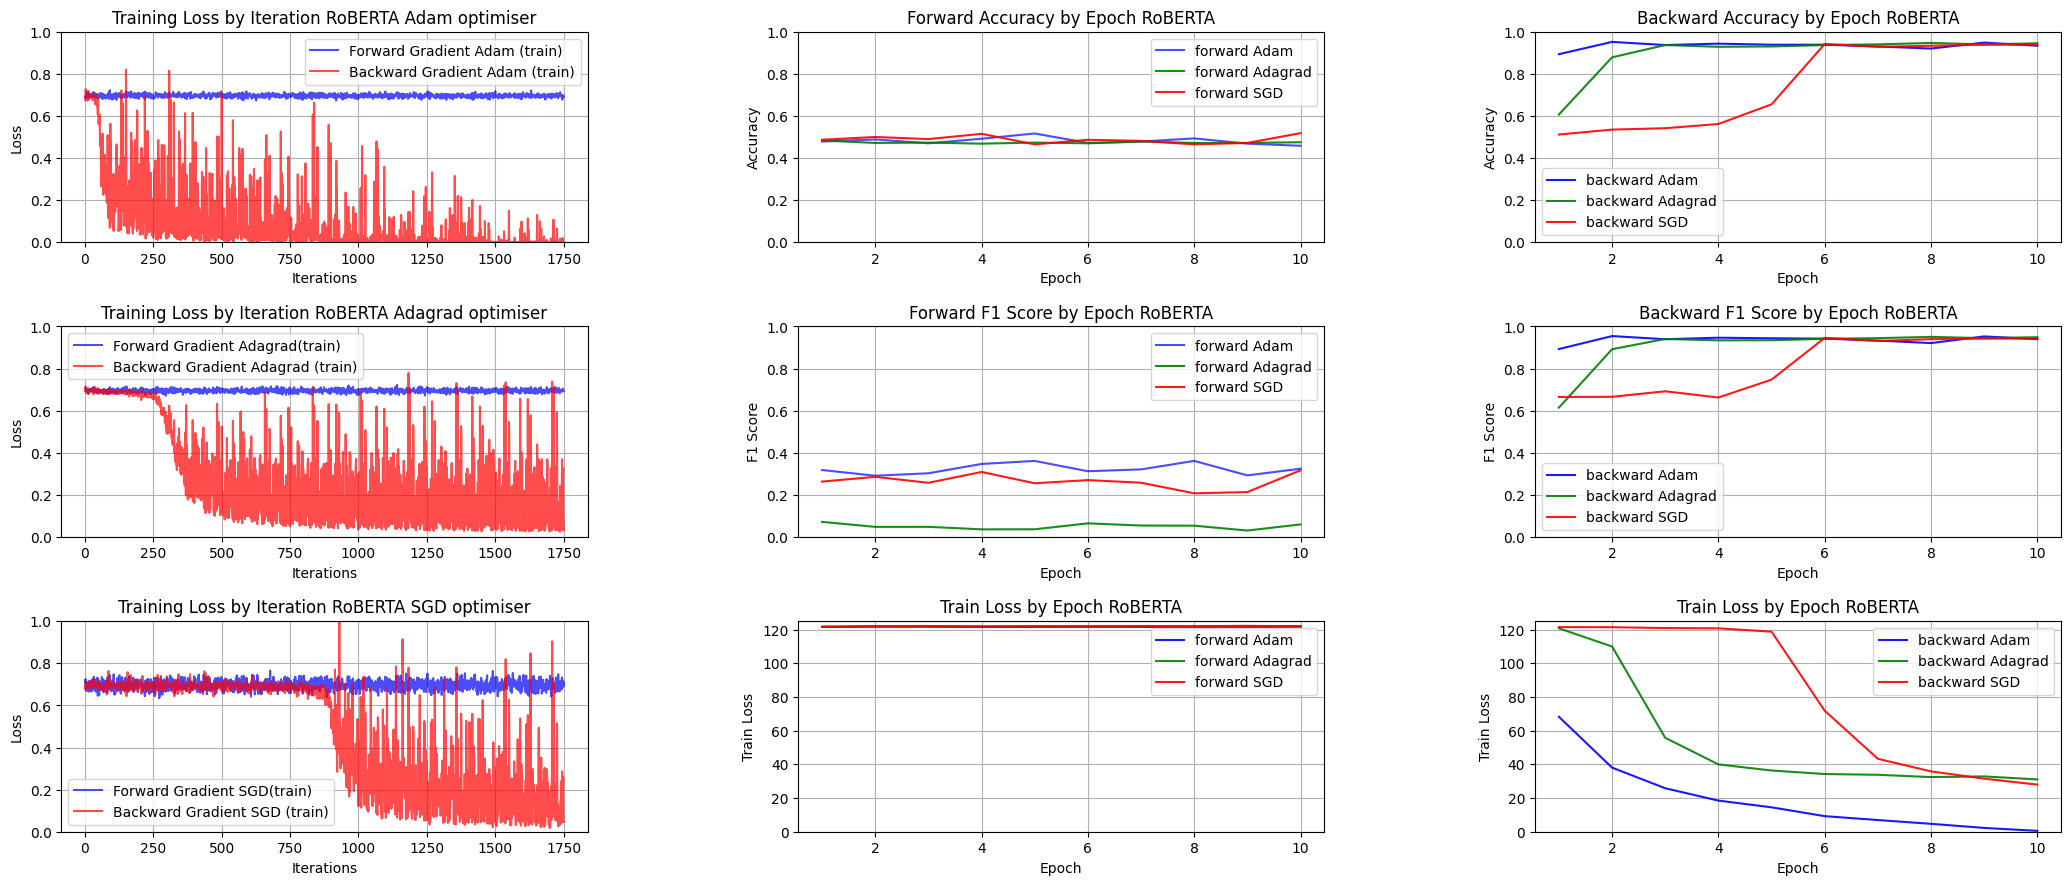

In [57]:
fig, ax = plt.subplots(3,3,figsize= (25,10), sharey = False, sharex = False)

adam_forward_combined = pd.DataFrame({
    'step': adam_forward['step'],
    'loss_1': adam_forward['loss_step'],
    'loss_2': adam_forward2['loss_step'],
    'loss_3': adam_forward3['loss_step']
})

adagrad_forward_combined = pd.DataFrame({
    'step': adagrad_forward['step'],
    'loss_1': adagrad_forward['loss_step'],
    'loss_2': adagrad_forward2['loss_step'],
    'loss_3': adagrad_forward3['loss_step']
})

adam_backward_combined = pd.DataFrame({
    'step': adam_backward['step'],
    'loss_1': adam_backward['loss_step'],
    'loss_2': adam_backward2['loss_step'],
    'loss_3': adam_backward3['loss_step']
})

adagrad_backward_combined = pd.DataFrame({
    'step': adagrad_backward['step'],
    'loss_1': adagrad_backward['loss_step'],
    'loss_2': adagrad_backward2['loss_step'],
    'loss_3': adagrad_backward3['loss_step']
})

adam_forward_combined['mean_loss'] = adam_forward_combined[['loss_1', 'loss_2', 'loss_3']].mean(axis=1)
adam_forward_combined['std_loss'] = adam_forward_combined[['loss_1', 'loss_2', 'loss_3']].std(axis=1)
adam_forward_confidence_interval = 1.96 * adam_forward_combined['std_loss'] / np.sqrt(3)

adagrad_forward_combined['mean_loss'] = adagrad_forward_combined[['loss_1', 'loss_2', 'loss_3']].mean(axis=1)
adagrad_forward_combined['std_loss'] = adagrad_forward_combined[['loss_1', 'loss_2', 'loss_3']].std(axis=1)
adagrad_forward_confidence_interval = 1.96 * adagrad_forward_combined['std_loss'] / np.sqrt(3)


adam_backward_combined['mean_loss'] = adam_backward_combined[['loss_1', 'loss_2', 'loss_3']].mean(axis=1)
adam_backward_combined['std_loss'] = adam_backward_combined[['loss_1', 'loss_2', 'loss_3']].std(axis=1)
adam_backward_confidence_interval = 1.96 * adam_backward_combined['std_loss'] / np.sqrt(3)

adagrad_backward_combined['mean_loss'] = adagrad_backward_combined[['loss_1', 'loss_2', 'loss_3']].mean(axis=1)
adagrad_backward_combined['std_loss'] = adagrad_backward_combined[['loss_1', 'loss_2', 'loss_3']].std(axis=1)
adagrad_backward_confidence_interval = 1.96 * adagrad_backward_combined['std_loss'] / np.sqrt(3)



ax[0][0].plot(adam_forward_combined['step'], adam_forward_combined['mean_loss'], 'b-', label='Forward Gradient Adam (train)', alpha=0.7)
ax[0][0].plot(adam_backward_combined['step'], adam_backward_combined['mean_loss'], 'r-', label='Backward Gradient Adam (train)', alpha=0.7)

ax[0][0].set_xlabel('Iterations')
ax[0][0].set_ylabel('Loss')
ax[0][0].set_title('Training Loss by Iteration RoBERTA Adam optimiser')
ax[0][0].legend()
ax[0][0].grid(True)
ax[0][0].set_ylim([0, 1])


ax[1][0].plot(adagrad_forward_combined['step'], adagrad_forward_combined['mean_loss'], 'b-', label='Forward Gradient Adagrad(train)', alpha=0.7 )
ax[1][0].plot(adagrad_backward_combined['step'], adagrad_backward_combined['mean_loss'], 'r-', label='Backward Gradient Adagrad (train)', alpha=0.7)

ax[1][0].set_xlabel('Iterations')
ax[1][0].set_ylabel('Loss')
ax[1][0].set_title('Training Loss by Iteration RoBERTA Adagrad optimiser')
ax[1][0].legend()
ax[1][0].grid(True)
ax[1][0].set_ylim([0, 1])

ax[2][0].plot(sgd_forward['step'], sgd_forward['loss_step'], 'b-', label='Forward Gradient SGD(train)', alpha=0.7 )
ax[2][0].plot(sgd_backward['step'], sgd_backward['loss_step'], 'r-', label='Backward Gradient SGD (train)', alpha=0.7)

ax[2][0].set_xlabel('Iterations')
ax[2][0].set_ylabel('Loss')
ax[2][0].set_title('Training Loss by Iteration RoBERTA SGD optimiser')
ax[2][0].legend()
ax[2][0].grid(True)
ax[2][0].set_ylim([0, 1])


# Plot individual runs
ax[0][1].plot(adam_forward_perf['epoch'], adam_forward_perf['accuracy'], 'b-', alpha=0.7, label='forward Adam')
ax[0][1].plot(adam_forward_perf['epoch'], adagrad_forward_perf['accuracy'], 'g-', alpha=0.9, label='forward Adagrad')
ax[0][1].plot(sgd_forward_perf['epoch'], sgd_forward_perf['accuracy'], 'r-', alpha=0.9, label='forward SGD')
ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('Accuracy')
ax[0][1].set_title('Forward Accuracy by Epoch RoBERTA')
ax[0][1].legend()
ax[0][1].grid(True)
ax[0][1].set_ylim([0, 1])

# Plot individual runs
ax[0][2].plot(adam_backward_perf['epoch'], adam_backward_perf['accuracy'], 'b-', alpha=0.9, label='backward Adam ')
ax[0][2].plot(adam_backward_perf['epoch'], adagrad_backward_perf['accuracy'], 'g-', alpha=0.9, label='backward Adagrad')
ax[0][2].plot(sgd_backward_perf['epoch'], sgd_backward_perf['accuracy'], 'r-', alpha=0.9, label='backward SGD')
ax[0][2].set_xlabel('Epoch')
ax[0][2].set_ylabel('Accuracy')
ax[0][2].set_title('Backward Accuracy by Epoch RoBERTA')
ax[0][2].legend()
ax[0][2].grid(True)
ax[0][2].set_ylim([0, 1])

# Plot individual runs
ax[1][1].plot(adam_forward_perf['epoch'], adam_forward_perf['f1_score'], 'b-', alpha=0.7, label='forward Adam')
ax[1][1].plot(adagrad_forward_perf['epoch'], adagrad_forward_perf['f1_score'], 'g-', alpha=0.9, label='forward Adagrad')
ax[1][1].plot(sgd_forward_perf['epoch'], sgd_forward_perf['f1_score'], 'r-', alpha=0.9, label='forward SGD')
ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('F1 Score')
ax[1][1].set_title('Forward F1 Score by Epoch RoBERTA')
ax[1][1].legend()
ax[1][1].grid(True)
ax[1][1].set_ylim([0, 1])

# Plot individual runs
ax[1][2].plot(adam_backward_perf['epoch'], adam_backward_perf['f1_score'], 'b-', alpha=0.9, label='backward Adam ')
ax[1][2].plot(adagrad_backward_perf['epoch'], adagrad_backward_perf['f1_score'], 'g-', alpha=0.9, label='backward Adagrad')
ax[1][2].plot(sgd_backward_perf['epoch'], sgd_backward_perf['f1_score'], 'r-', alpha=0.9, label='backward SGD')
ax[1][2].set_xlabel('Epoch')
ax[1][2].set_ylabel('F1 Score')
ax[1][2].set_title('Backward F1 Score by Epoch RoBERTA')
ax[1][2].legend()
ax[1][2].grid(True)
ax[1][2].set_ylim([0, 1])

# Plot individual runs
ax[2][1].plot(adam_forward_loss_per_epoch['epoch'], adam_forward_loss_per_epoch['loss'], 'b-', alpha=0.9, label='forward Adam ')
ax[2][1].plot(adagrad_forward_loss_per_epoch['epoch'], adagrad_forward_loss_per_epoch['loss'], 'g-', alpha=0.9, label='forward Adagrad')
ax[2][1].plot(sgd_forward_loss_per_epoch['epoch'], sgd_forward_loss_per_epoch['loss'], 'r-', alpha=0.9, label='forward SGD')
ax[2][1].set_xlabel('Epoch')
ax[2][1].set_ylabel('Train Loss')
ax[2][1].set_title('Train Loss by Epoch RoBERTA')
ax[2][1].legend()
ax[2][1].grid(True)
ax[2][1].set_ylim([0, 125])

# Plot individual runs
ax[2][2].plot(adam_backward_loss_per_epoch['epoch'], adam_backward_loss_per_epoch['loss'], 'b-', alpha=0.9, label='backward Adam ')
ax[2][2].plot(adagrad_backward_loss_per_epoch['epoch'], adagrad_backward_loss_per_epoch['loss'], 'g-', alpha=0.9, label='backward Adagrad')
ax[2][2].plot(sgd_backward_loss_per_epoch['epoch'], sgd_backward_loss_per_epoch['loss'], 'r-', alpha=0.9, label='backward SGD')
ax[2][2].set_xlabel('Epoch')
ax[2][2].set_ylabel('Train Loss')
ax[2][2].set_title('Train Loss by Epoch RoBERTA')
ax[2][2].legend()
ax[2][2].grid(True)
ax[2][2].set_ylim([0, 125])


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()